<a href="https://colab.research.google.com/github/pedroblossbraga/supportvectormachines_tcc/blob/master/TCC_linearSVC_SGD_hinge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_blobs

In [2]:
def plot_clf_decision_func(clf, label, color, marker='None'):
  w = clf.coef_[0]
  a = -w[0] / w[1]
  xx = np.linspace(-5, 5)
  yy = a * xx - (clf.intercept_[0]) / w[1] # hiperplano de separação

  # calculando a margem
  margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))

  # paralelas ao hiperplano de separação
  yy_down = yy - np.sqrt(1 + a ** 2) * margin # hiperplano inferior
  yy_up = yy + np.sqrt(1 + a ** 2) * margin # hiperplano superior

  # linhas do hiperplano de decisão
  plt.plot(xx, yy, linestyle = "--", marker=marker,
           label=label,
           color=color)
  
  plt.plot(xx, yy_down, "k--", color='k')
  plt.plot(xx, yy_up, "k--", color='k')

  plt.fill_between(
      xx,
      yy_down,
      yy_up,
      alpha=0.3,
      color=color
  )


In [3]:
def get_acc(X, y, clf):
  y_pred = clf.predict(X)
  return sum(y==y_pred)/y.shape[0]

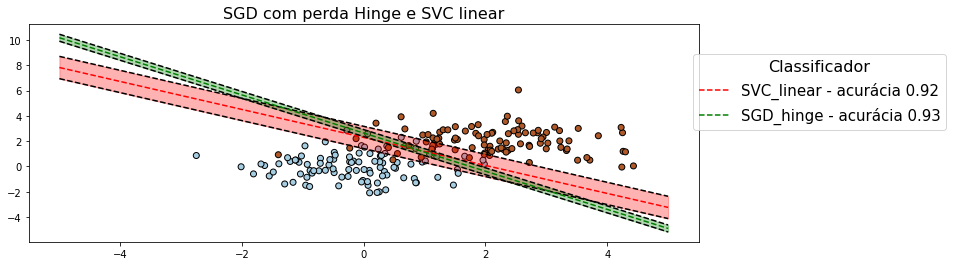

In [4]:
# dados fictícios de 100 instâncias por classe e desvio 1.05
n_samples_1 = 100
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.05, 1.05]

X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=42,
    shuffle=False,
)
# SVC linear
clf1 = svm.SVC(kernel="linear")
clf1.fit(X, y)
acc1 = get_acc(X, y, clf1)

# Stochastic Gradient Descent Classifier com Hinge Loss
clf2 = SGDClassifier(loss="hinge", random_state=42)
clf2.fit(X, y)
acc2 = get_acc(X, y, clf2)


plt.figure(figsize=(12,4))
# plotando as amostras
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plotando as funções de decisão lineares
plot_clf_decision_func(clf1, label=f'SVC_linear - acurácia {acc1}', color = 'red') #, marker='x')
plot_clf_decision_func(clf2, label=f'SGD_hinge - acurácia {acc2}', color = 'green') #, marker='o')

plt.legend(
           bbox_to_anchor = (0.98, 0.9),
           title='Classificador',
           title_fontsize=16,
           fontsize=15
           )
plt.title('SGD com perda Hinge e SVC linear', fontsize = 16)
plt.show()